In [2]:
!pip uninstall -y fastai deoldify
!pip install fastai==1.0.60
!pip install deoldify
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

Found existing installation: fastai 1.0.60
Uninstalling fastai-1.0.60:
  Successfully uninstalled fastai-1.0.60
  Using cached fastai-1.0.60-py3-none-any.whl.metadata (14 kB)
Using cached fastai-1.0.60-py3-none-any.whl (237 kB)
  Using cached deoldify-0.0.1-py3-none-any.whl.metadata (28 kB)
Using cached deoldify-0.0.1-py3-none-any.whl (241 kB)


<DeviceId.GPU0: 0>

In [3]:
from deoldify.visualize import *
plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.


NOTE:  Set artistic to False if you're having trouble getting a good render.  Chances are it will work with the Stable model.

In [6]:
import torch
from functools import partial
import os

# Ensure the models directory exists
if not os.path.exists('models'):
    os.makedirs('models')

# Download the artistic model if it doesn't exist
if not os.path.exists('models/ColorizeArtistic_gen.pth'):
    print("Downloading ColorizeArtistic_gen.pth...")
    os.system('wget -P models/ https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth')

# Download the stable model if it doesn't exist (good practice to have both)
if not os.path.exists('models/ColorizeStable_gen.pth'):
    print("Downloading ColorizeStable_gen.pth...")
    os.system('wget -P models/ https://data.deepai.org/deoldify/ColorizeStable_gen.pth')


# Store the original torch.load function
_original_torch_load = torch.load

# Temporarily override torch.load to always use weights_only=False
# This is necessary because deoldify/fastai v1 models might not be compatible with
# the default weights_only=True in newer PyTorch versions.
torch.load = partial(_original_torch_load, weights_only=False)

try:
    colorizer = get_image_colorizer(artistic=True)
finally:
    # Restore the original torch.load function to avoid unexpected side effects
    torch.load = _original_torch_load

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:424: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  self.check_worker_number_rationality()
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can

# Instructions

### source_url
Type in a url to a direct link of an image.  Usually that means they'll end in .png, .jpg, etc.  NOTE: If you want to use your own image, you can set source_url to None and just upload the image to /test_images/ in Jupyter.  Just make sure that the source_path parameter matches the file you uploaded.

### source_path
Name this whatever sensible image path (plus extension of jpg/png/ext) you want!  Sensible means the path exists and the file exists if source_url=None.

### render_factor
The default value of 35 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the image is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality images in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality images, but the colors may get slightly washed out.

### result_path
Ditto- don't change.

### How to Download a Copy
Simply shift+right click on the displayed image and click "Save Image As..."!


## Pro Tips
1. You can evaluate how well the image is rendered at each render_factor by using the code at the bottom (that cell under "See how well render_factor values perform on a frame here").
2. Keep in mind again that you can go up top and set artistic to False for the colorizer to use the 'Stable' model instead.  This will often tend to do better on portraits, and natural landscapes.  


## Troubleshooting
If you get a 'CUDA out of memory' error, you probably have the render_factor too high.  The max is 45 on 11GB video cards.

## Colorize!!

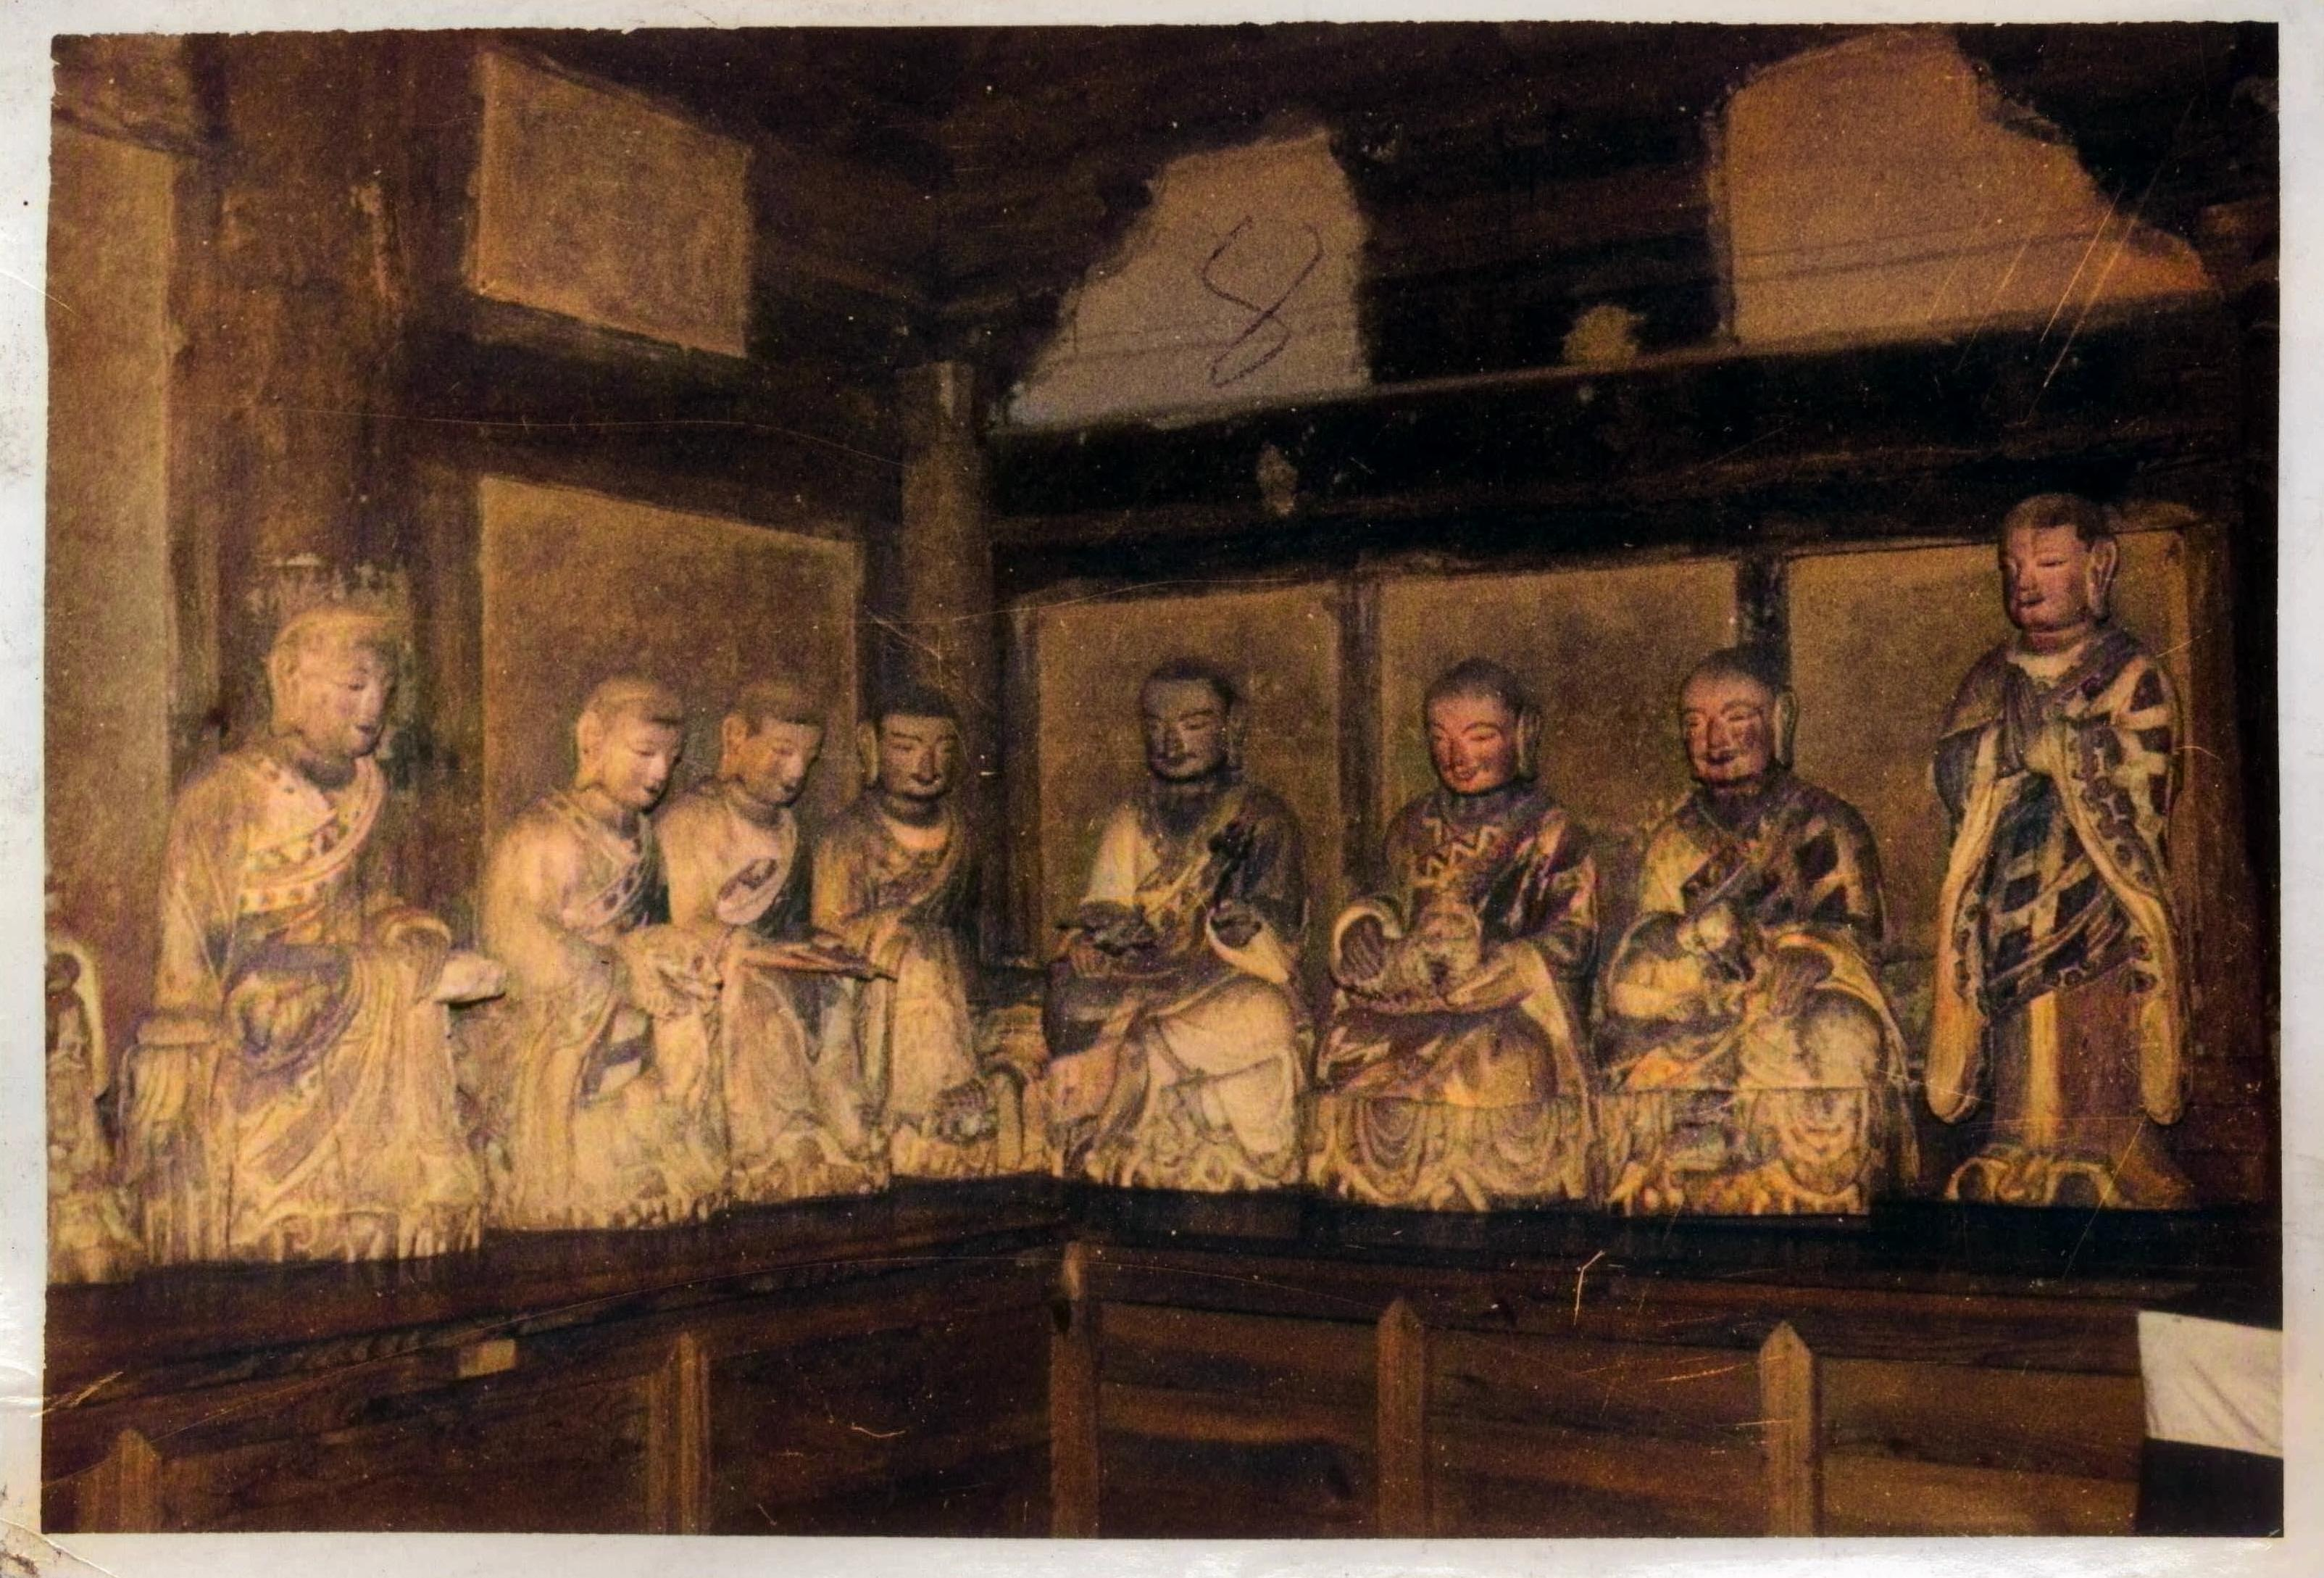

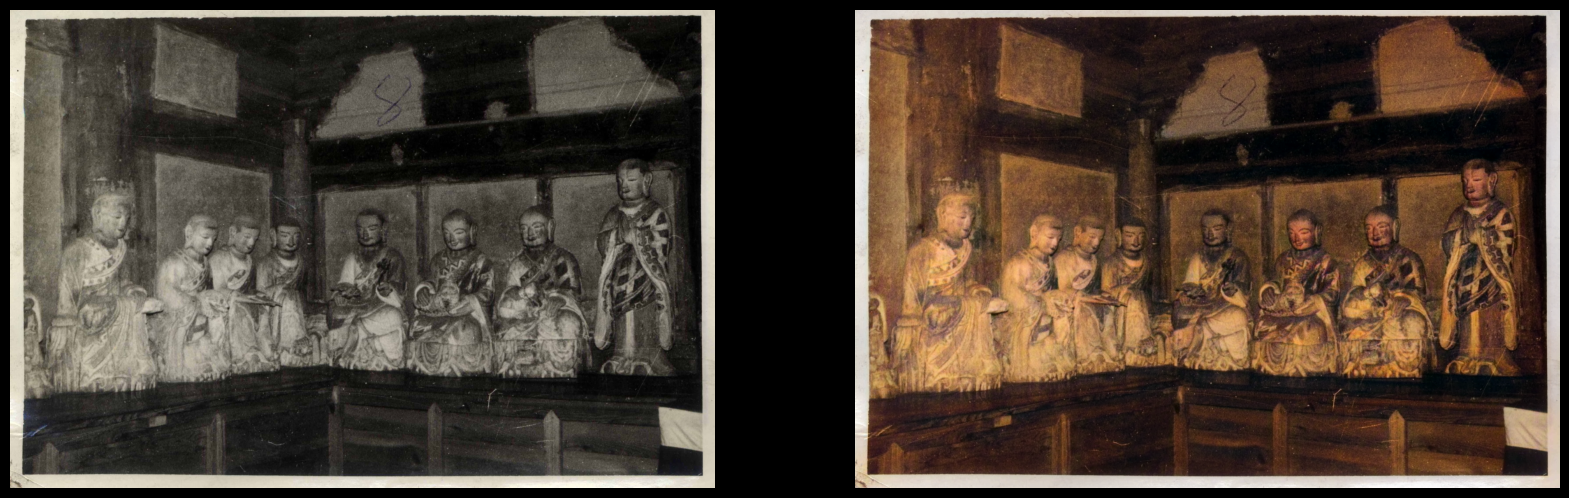

In [13]:
import os

#NOTE:  Max is 45 with 11GB video cards. 35 is a good default
render_factor=25 # Set back to 25 as requested
#NOTE:  Make source_url None to just read from file at ./video/source/[file_name] directly without modification
source_url=None
source_path = 'test_images/4275.jpg' # Changed to 4275.jpg
result_path = None

# Create the directory if it doesn't exist
if not os.path.exists(os.path.dirname(source_path)):
    os.makedirs(os.path.dirname(source_path))

if source_url is not None:
    result_path = colorizer.plot_transformed_image_from_url(url=source_url, path=source_path, render_factor=render_factor, compare=True)
else:
    result_path = colorizer.plot_transformed_image(path=source_path, render_factor=render_factor, compare=True)

show_image_in_notebook(result_path)

## See how well render_factor values perform on the image here

In [ ]:
#for i in range(10,46):
    #colorizer.plot_transformed_image(source_path, render_factor=i, display_render_factor=True, figsize=(10,10))